# Analysis notebook: `SU2020e_signal_onspill-LH_au`  

## Define analysis name

In [1]:
ana_label = "SU2020e_signal_onspill-LH_au"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020e_signal_onspill-LH_au

analysis.csv  hists.h5	   SU2020e_signal_onspill-LH_au.log
cut_flow.csv  results.pkl  SU2020e_signal_onspill-LH_au.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020e_signal_onspill-LH_au


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020e_signal_onspill-LH_au/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020e_signal_onspill-LH_au/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020e_signal_onspill-LH_au/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020e_signal_onspill-LH_au/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/SU2020e_signal_onspill-LH_au/events.parquet
[Load] ⚠️ File not found: ../../../output/results/SU2020e_signal_onspill-LH_au/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,1454548,100.000,100.000,No selection applied
1,has_trk_front,Preselect,1454280,99.982,99.982,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,1428881,98.235,98.254,Electron track fits
3,is_downstream,Preselect,1428761,98.227,99.992,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1424823,97.956,99.724,One reco electron / event
5,is_truth_electron,Preselect,1424821,97.956,100.000,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,1253384,86.170,87.968,Track fit quality > 0.2
7,within_t0,Tracker,901342,61.967,71.913,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,880385,60.526,97.675,>20 active tracker hits
9,within_d0,Tracker,871229,59.897,98.960,Distance of closest approach (d_0 < 100 mm)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,807735,763883,569927,0,0,0
1,N,4000000,4000000,4000000,807735,763883,569927
2,Eff [%],20.193375,19.097075,14.248175,100.0,100.0,100.0
3,Eff Err$-$ [%],-0.020065,-0.019646,-0.017468,-0.000124,-0.000131,-0.000175
4,Eff Err$+$ [%],0.02008,0.019661,0.017486,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],807735.0,763883.0,569927.0,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-893.763359,-869.163667,-750.754623,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],894.756543,870.156867,751.747912,1.139434,1.139434,1.139434
8,Rate 2B [$\text{day}^{-1}$],807735.0,763883.0,569927.0,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-893.763359,-869.163667,-750.754623,0.0,0.0,0.0


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020e_signal_onspill-LH_au/h1o_1x3_mom_windows.png


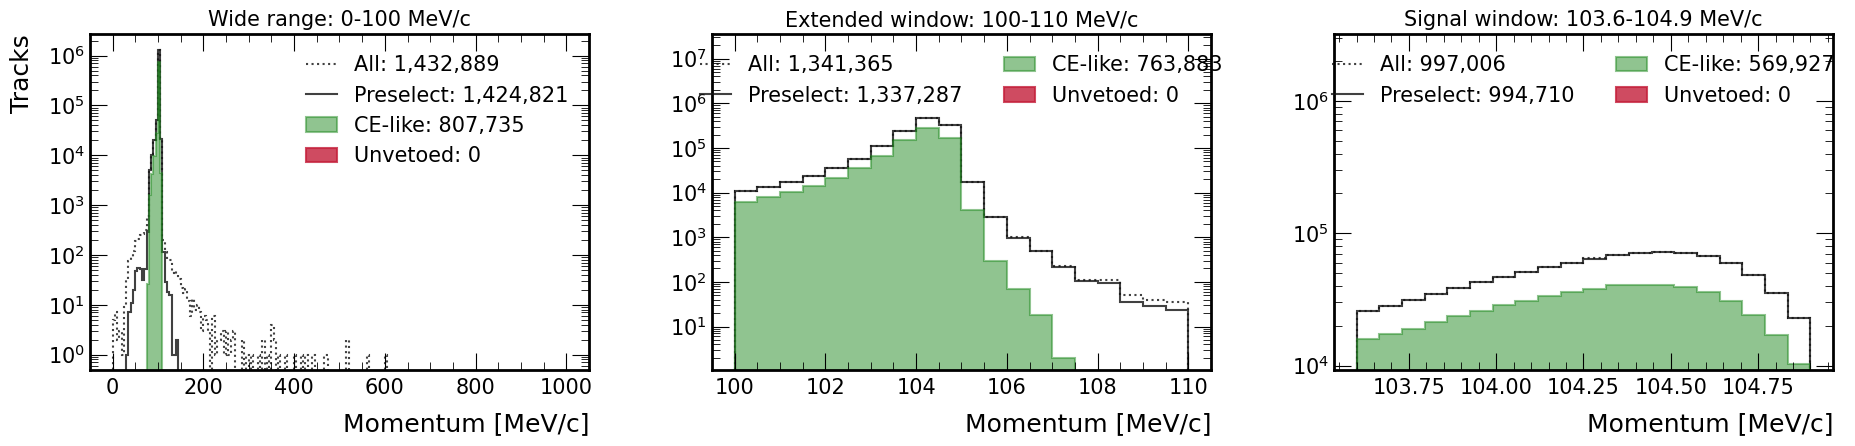

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_signal_onspill-LH_au/h1o_3x3_summary.png


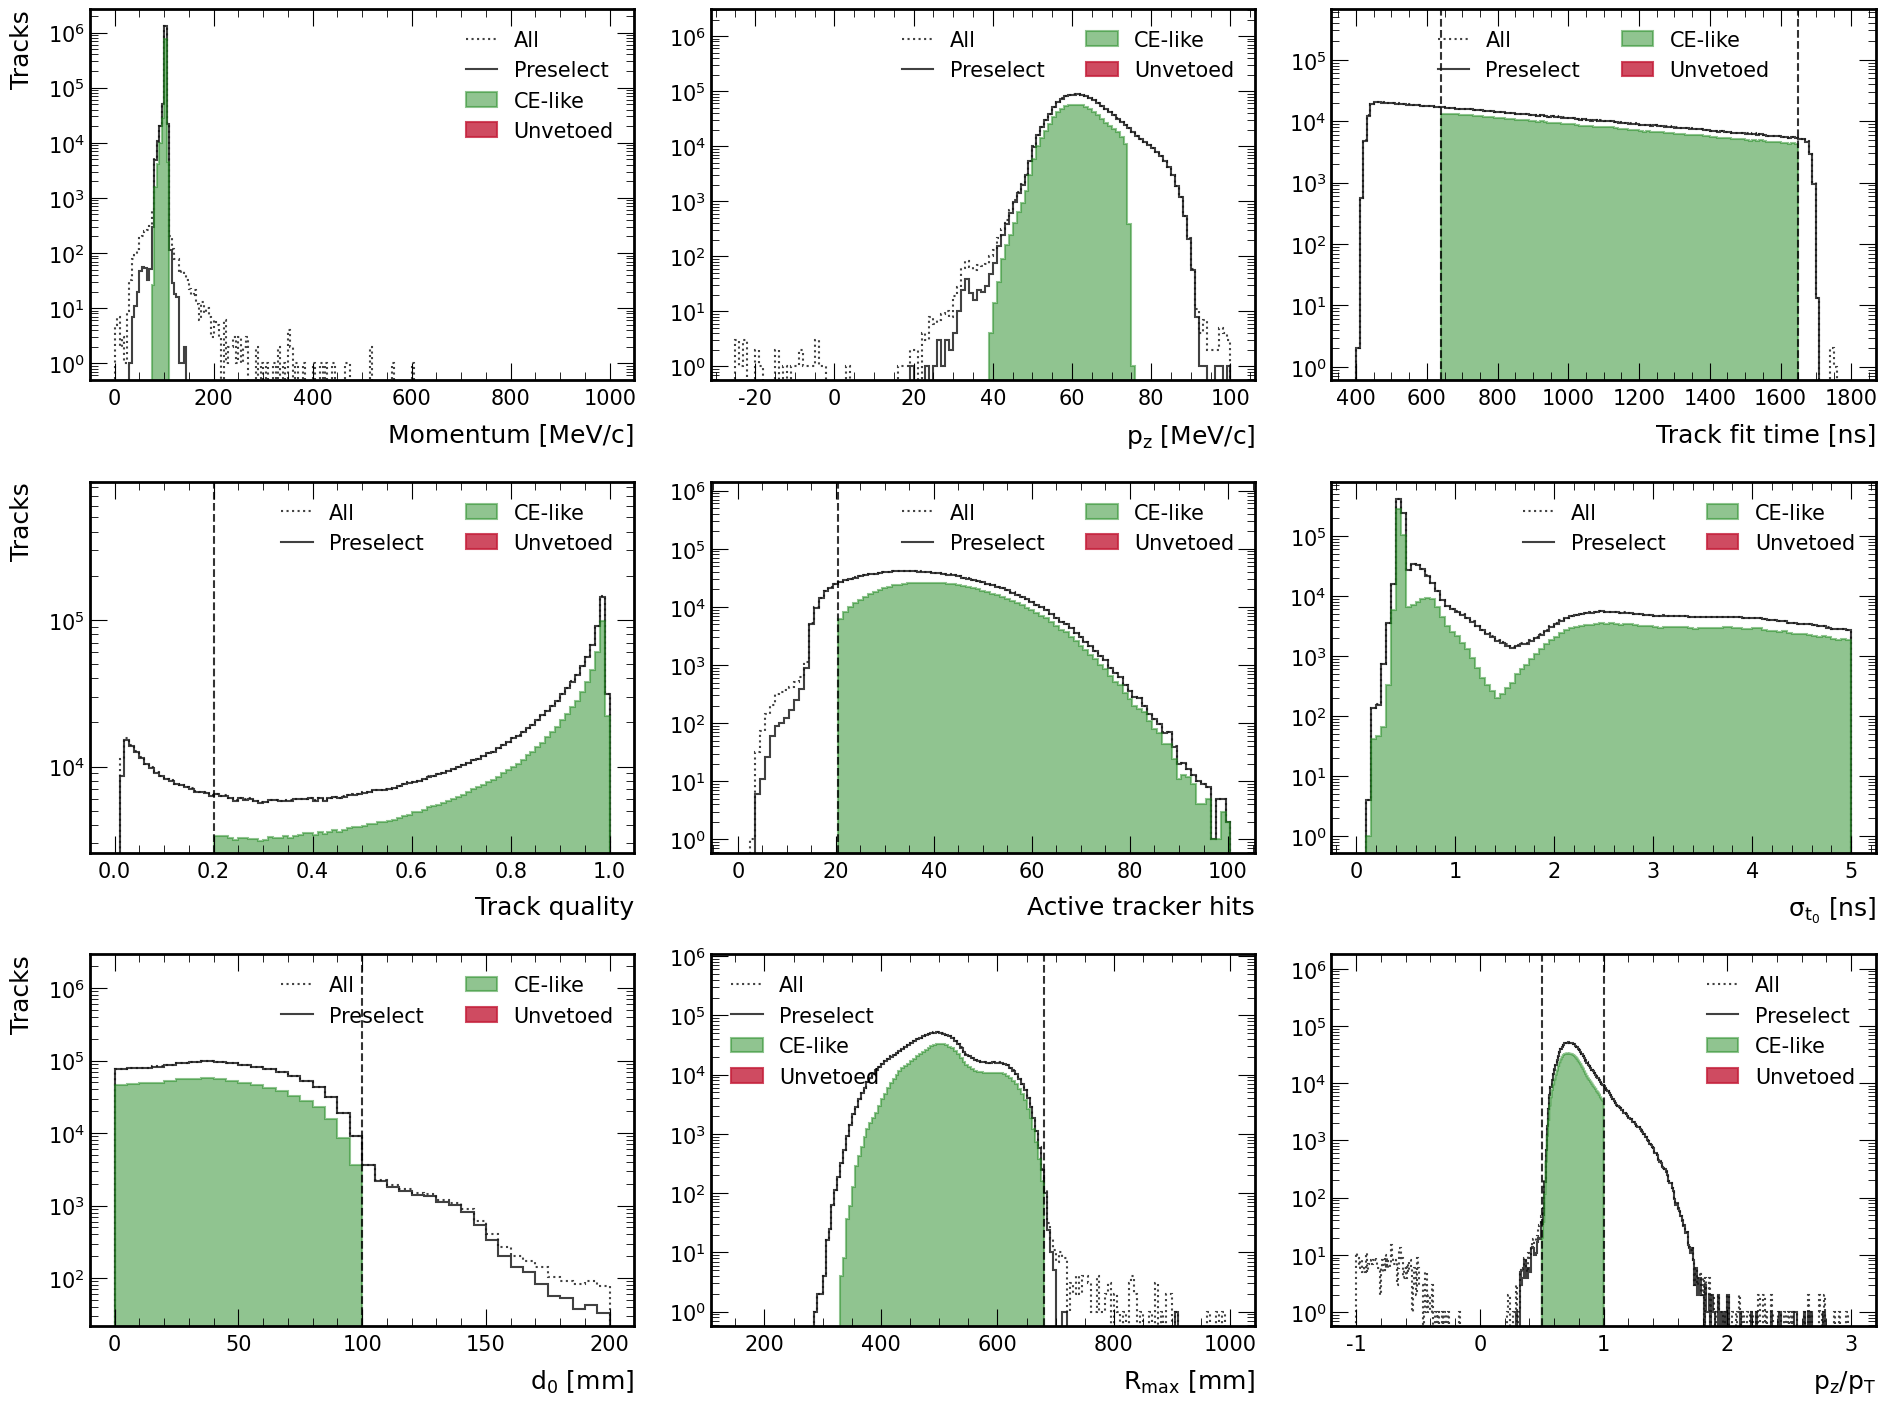

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_signal_onspill-LH_au/h1o_2x2_mom_summary.png


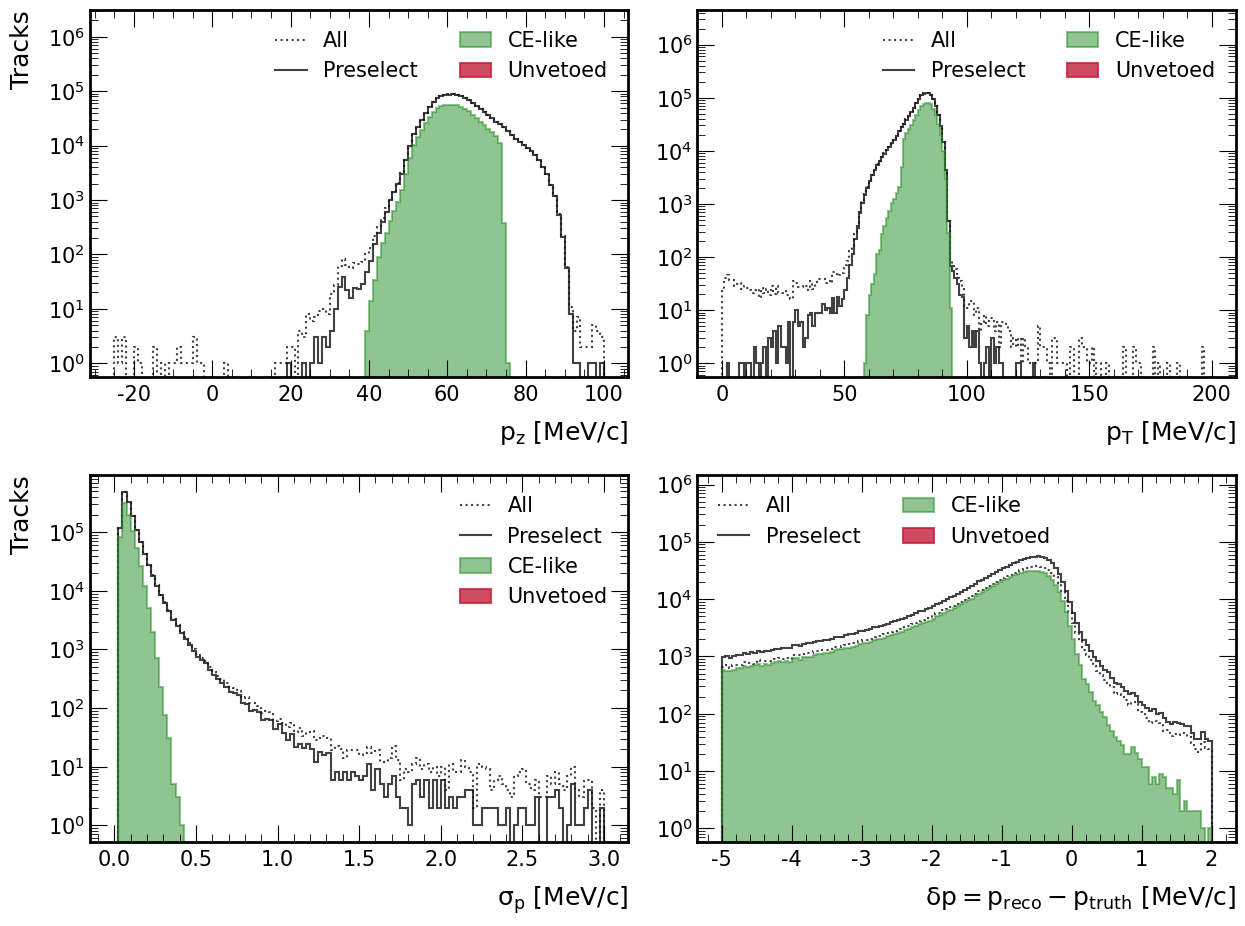

In [11]:
draw.plot_mom_summary(results["hists"], out_path=f"{img_dir}/h1o_2x2_mom_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020e_signal_onspill-LH_au/h1o_crv_z.png


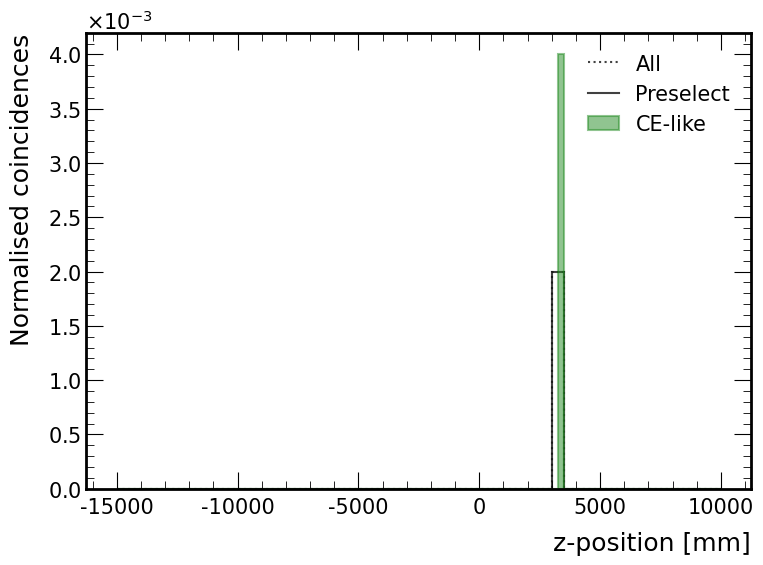

In [12]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

Fitting Reverse Landau to selection: CE-like
Momentum range: -4.98 to 1.98 MeV/c
Fitting only core region: -1.0 to 0.0 MeV/c
Total counts in fit region: 459735

Reverse Landau Fit Results:
Amplitude = 34383.48 +/- 220.39
MPV = -0.544 +/- 0.002 MeV/c
Sigma = 0.263 +/- 0.002 MeV/c
Momentum Resolution = 0.263 +/- 0.002 MeV/c
Chi-squared = 135.16
Degrees of freedom = 17
Reduced chi-squared = 7.950


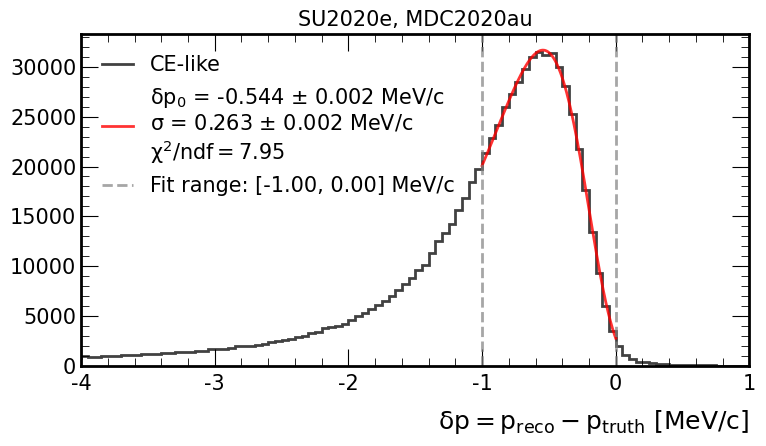

Wrote ../../output/images/../../../output/images/SU2020e_signal_onspill-LH_au/fit_mom_res.png


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import moyal

def reverse_landau_function(x, amplitude, mpv, sigma):
    """
    Reverse Landau distribution function (flipped horizontally)
    Sharp cutoff on the right, long tail to the left
    
    Parameters:
    amplitude: height scaling factor
    mpv: most probable value (peak position)
    sigma: width parameter
    """
    return amplitude * moyal.pdf((mpv - x) / sigma, 0, 1) / sigma

def fit_landau(hist, selection='All', fit_range=None):
    """
    Fit reverse Landau distribution to momentum resolution histogram
    
    Parameters:
    hist: your hist library histogram
    selection: selection category ('All', 'Preselect', 'CE-like', 'Unvetoed')
    fit_range: tuple (min, max) to restrict fitting to core region
    
    Returns:
    fitted_params: [amplitude, mpv, sigma]
    param_errors: uncertainties on fitted parameters
    resolution: momentum resolution (sigma)
    reduced_chi2: reduced chi-squared goodness of fit
    """
    
    # Extract data from histogram
    mom_res_axis = hist.axes[0]
    bin_centers = mom_res_axis.centers
    
    try:
        hist_values = hist[{'selection': selection}].values()
    except:
        hist_values = hist[:, selection].values()
    
    print(f"Fitting Reverse Landau to selection: {selection}")
    print(f"Momentum range: {bin_centers.min():.2f} to {bin_centers.max():.2f} MeV/c")
    
    # Apply fit range restriction if specified
    original_bin_centers = bin_centers.copy()
    original_hist_values = hist_values.copy()
    
    if fit_range is not None:
        mask_range = (bin_centers >= fit_range[0]) & (bin_centers <= fit_range[1])
        bin_centers = bin_centers[mask_range]
        hist_values = hist_values[mask_range]
        print(f"Fitting only core region: {fit_range[0]:.1f} to {fit_range[1]:.1f} MeV/c")
    
    print(f"Total counts in fit region: {np.sum(hist_values):.0f}")
    
    # Remove zero bins
    mask = hist_values > 0
    bin_centers_fit = bin_centers[mask]
    hist_values_fit = hist_values[mask]
    
    # Initial parameter guesses
    max_val = np.max(hist_values_fit)
    peak_pos = bin_centers_fit[np.argmax(hist_values_fit)]
    
    # Estimate width from data
    half_max = max_val / 2
    indices = np.where(hist_values_fit > half_max)[0]
    if len(indices) > 1:
        width_estimate = bin_centers_fit[indices[-1]] - bin_centers_fit[indices[0]]
    else:
        width_estimate = 1.0
    
    initial_params = [max_val, peak_pos, width_estimate]
    
    try:
        # Fit with Poisson weighting
        weights = 1.0 / np.sqrt(np.maximum(hist_values_fit, 1))
        
        popt, pcov = curve_fit(
            reverse_landau_function, bin_centers_fit, hist_values_fit,
            p0=initial_params, sigma=weights, maxfev=5000
        )
        
        param_errors = np.sqrt(np.diag(pcov))
        resolution = abs(popt[2])  # sigma parameter
        
        # Calculate reduced chi-squared
        y_fitted = reverse_landau_function(bin_centers_fit, *popt)
        chi_squared = np.sum(((hist_values_fit - y_fitted)**2) / hist_values_fit)
        dof = len(bin_centers_fit) - len(popt)  # degrees of freedom
        reduced_chi2 = chi_squared / dof if dof > 0 else float('inf')
        
        print(f"\nReverse Landau Fit Results:")
        print(f"Amplitude = {popt[0]:.2f} +/- {param_errors[0]:.2f}")
        print(f"MPV = {popt[1]:.3f} +/- {param_errors[1]:.3f} MeV/c")
        print(f"Sigma = {popt[2]:.3f} +/- {param_errors[2]:.3f} MeV/c")
        print(f"Momentum Resolution = {resolution:.3f} +/- {param_errors[2]:.3f} MeV/c")
        print(f"Chi-squared = {chi_squared:.2f}")
        print(f"Degrees of freedom = {dof}")
        print(f"Reduced chi-squared = {reduced_chi2:.3f}")
        
        return popt, param_errors, resolution, chi_squared, dof
        
    except Exception as e:
        print(f"Reverse Landau fit failed: {e}")
        return None, None, None, None

def plot_histogram_with_fit(hist, draw_plotter, selection="CE-like", fit_range=None, 
                           plot_range=(-1, 0.5), hist_color="#228B22", fit_color="red", fig_ax=None):
    """
    Complete function to plot histogram and add Landau fit
    
    Parameters:
    hist: your hist library histogram
    draw_plotter: your drawing object with _plot_histogram method
    selection: selection category ('All', 'Preselect', 'CE-like', 'Unvetoed')
    fit_range: tuple (min, max) to restrict fitting to core region
    plot_range: tuple (min, max) for the plot x-axis range
    fit_color: color for the fit line
    fig_ax: optional (fig, ax) tuple, creates new if None
    
    Returns:
    fig, ax, fitted_params, param_errors, resolution, reduced_chi2
    """
    
    # Perform the fit
    fitted_params, param_errors, resolution, chi2, dof = fit_landau(hist, selection, fit_range)
    
    # Create figure if not provided
    if fig_ax is None:
        fig, ax = plt.subplots(figsize=(1.25*6.4, 4.8))
    else:
        fig, ax = fig_ax
    
    # Plot the histogram using existing method
    
    # Plot histogram
    hist[{"selection": selection}].plot1d(
        ax=ax, 
        yerr=False,
        density=False,
        color=hist_color,
        edgecolor=hist_color,
        flow="none",
        histtype="step",
        linewidth=2.0,
        alpha=0.8,
        linestyle="-",
        label=selection
    )

    ###################

    # Add legend
    # ax.legend(loc='upper left', frameon=False)
    
    # Add the fit overlay
    if fitted_params is not None:
        x_fine = np.linspace(plot_range[0], plot_range[1], 500)
        y_fitted = reverse_landau_function(x_fine, *fitted_params)
        
        # Create fit label with parameters and chi-squared
        mpv, mpv_err = fitted_params[1], param_errors[1]
        sigma, sigma_err = fitted_params[2], param_errors[2]
        fit_label = (# rf'Reverse Landau fit' + '\n' + 
                    rf'$\delta p_{{0}}$ = {mpv:.3f} $\pm$ {mpv_err:.3f} MeV/c' + '\n' + 
                    rf'$\sigma$ = {sigma:.3f} $\pm$ {sigma_err:.3f} MeV/c' + '\n' +
                    r"$\chi^2/ \text{ndf} = $" + rf"{chi2 / dof:.2f} ")
        
        ax.plot(x_fine, y_fitted, color=fit_color, linewidth=2, 
                label=fit_label, alpha=0.8)
        
        # Add fit range boundaries if specified
        if fit_range is not None:
            ax.axvline(fit_range[0], color='gray', linestyle='--', alpha=0.7, linewidth=2.0,
                       label=f'Fit range: [{fit_range[0]:.2f}, {fit_range[1]:.2f}] MeV/c')
            ax.axvline(fit_range[1], color='gray', linestyle='--', alpha=0.7, linewidth=2.0)
        
        # # Add selection label to the plot
        # ax.text(0.02, 0.98, f'Selection: {selection}', transform=ax.transAxes, 
        #         verticalalignment='top', fontsize=12, 
        #         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add legend
        ax.legend(loc='upper left', frameon=False)
    
    return fig, ax, fitted_params, param_errors, resolution, chi2, dof

# def get_momentum_resolution(hist, selection='All', fit_range=None):
#     """
#     Simple function to get momentum resolution and fit quality
    
#     Returns:
#     resolution: momentum resolution in MeV/c (or None if fit fails)
#     reduced_chi2: reduced chi-squared goodness of fit
#     """
#     fitted_params, param_errors, resolution, chi2, dof = fit_landau(hist, selection, fit_range)
    
#     if resolution is not None:
#         print(f"\nSummary for {selection}:")
#         print(f"Momentum Resolution = {resolution:.3f} +/- {param_errors[2]:.3f} MeV/c")
#         print(f"Reduced chi-squared = {chi2 / dof:.3f}")
#         return resolution, chi2 / dof
#     else:
#         print(f"Could not determine resolution for {selection}")
#         return None, None

hist=results["hists"]["mom_res"]
fit_range=(-1.0, 0)
fig, ax, fitted_params, errors, resolution, chi2, dof = plot_histogram_with_fit(
    hist, draw, "CE-like", fit_range=fit_range, plot_range=fit_range, hist_color="#121212")

ax.set_xlim(-4,1)
ax.set_title("SU2020e, MDC2020au")
plt.tight_layout()
out_path=f"../../output/images/{img_dir}/fit_mom_res.png"
plt.savefig(out_path, dpi=300)
plt.show()
print(f"Wrote {out_path}")


### Background event info

In [14]:
print(results["event_info"])

None


In [15]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))